# Digikala Dataset

Importing the necessary libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arabic_reshaper import reshape
from bidi.algorithm import get_display

Reading the CSV file and displaying its head:

In [18]:
data = pd.read_csv("digikala-orders.csv")
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


Displaying Orders count per month (Plot) :

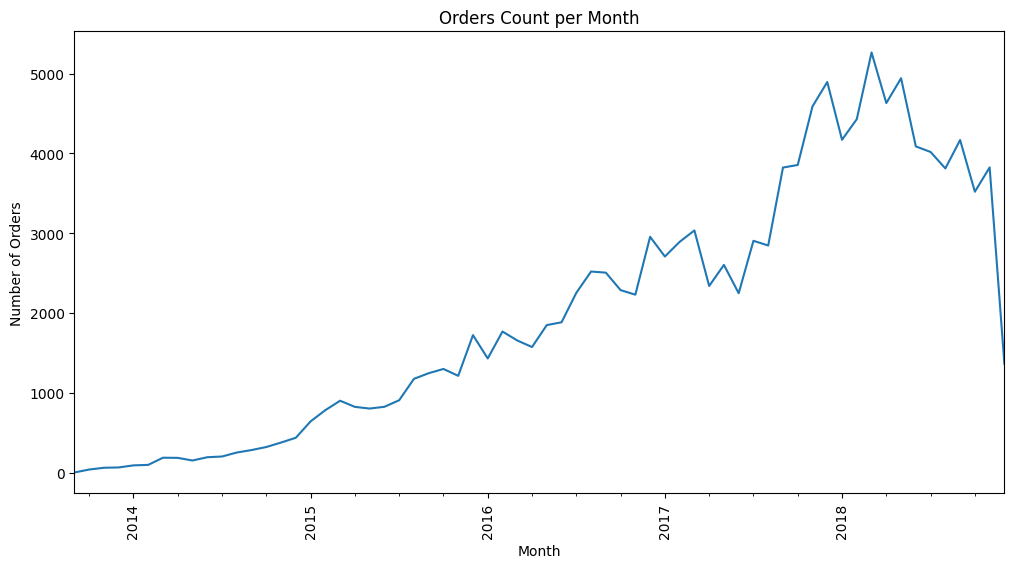

In [19]:
data["DateTime_CartFinalize"] = pd.to_datetime(data["DateTime_CartFinalize"],errors='coerce')
data['YearMonth'] = data['DateTime_CartFinalize'].dt.to_period('M')

orders_per_month = data.groupby('YearMonth').size()

orders_per_month.plot(kind='line', figsize=(12, 6))

plt.title('Orders Count per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

Creating a dataset for city names and the purchase percentage in those cities :

In [20]:
city_sales = data.groupby('city_name_fa')['Amount_Gross_Order'].sum()

total_sales = city_sales.sum()  
city_sales_percentage = (city_sales / total_sales) * 100

result_df = city_sales_percentage.reset_index()
result_df.columns = ['city_name_fa', 'sales_percentage'] 

result_df.to_csv('city_sales_percentage.csv', index=False, encoding='utf-8-sig')

"Dataset saved ✅"

'Dataset saved ✅'

Displaying the information :

In [21]:
dt = pd.read_csv("city_sales_percentage.csv")
dt.head()

,city_name_fa,sales_percentage
0,آب بر,0.001453
1,آبادان,0.207450
2,آباده,0.067646
3,آباده طشک,0.020557
4,آبدانان,0.050914


Displaying the percentage and cities with the highest purchases :

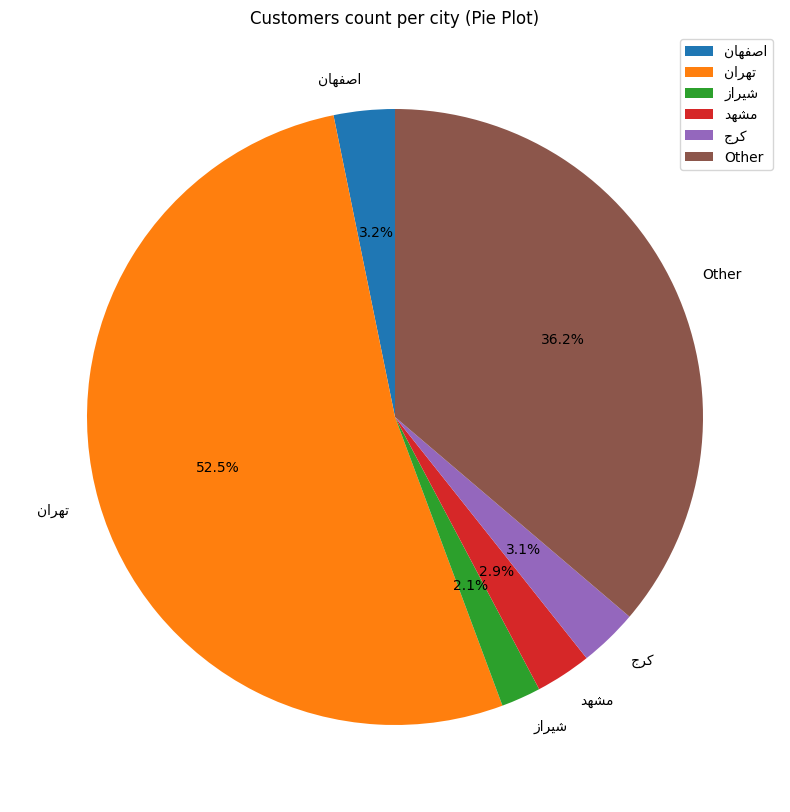

In [22]:

filter_2_city = dt.query("sales_percentage > 2")

others_percentage = dt.query("sales_percentage <= 2")["sales_percentage"].sum()

others_data = pd.DataFrame({"city_name_fa": ["Other"], "sales_percentage": [others_percentage]})
filtered_data = pd.concat([filter_2_city, others_data], ignore_index=True)

persian_text = [get_display(reshape(label)) for label in filtered_data['city_name_fa'].to_numpy(dtype='str')]

plt.figure(figsize=(12,10))
plt.pie(
    filtered_data["sales_percentage"], 
    labels=persian_text,
    autopct='%1.1f%%', 
    startangle=90
)

plt.legend()
plt.title("Customers count per city (Pie Plot)")
plt.show()
